In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
raw_data_path = '../data/raw/student_data.csv'
df_raw = pd.read_csv(raw_data_path)

df_processed = df_raw.copy()

processed_data_path = '../data/processed/student_data_processed.csv'
df_processed.to_csv(processed_data_path, index=False)

In [51]:
# Displaying the first few rows of the processed data to verify
# df_processed.head()
df_processed.describe

<bound method NDFrame.describe of      student_id  current_grade  attendance_rate  socio_emotional_score  \
0             1            3.5             84.0                     82   
1             2            3.0             97.0                     93   
2             3            4.0             93.0                     82   
3             4            1.0             96.0                     82   
4             5            4.0             97.0                     92   
..          ...            ...              ...                    ...   
995         996            NaN              NaN                     14   
996         997            NaN              NaN                     13   
997         998            NaN              NaN                     12   
998         999            NaN              NaN                     18   
999        1000            NaN              NaN                      5   

     average_grade_previous  
0                      2.93  
1                

In [52]:
df_processed = df_processed.fillna(0)

In [53]:
df_processed.head()

,student_id,current_grade,attendance_rate,socio_emotional_score,average_grade_previous
0,1,3.5,84.0,82,2.93
1,2,3.0,97.0,93,2.55
2,3,4.0,93.0,82,3.24
3,4,1.0,96.0,82,0.96
4,5,4.0,97.0,92,3.20


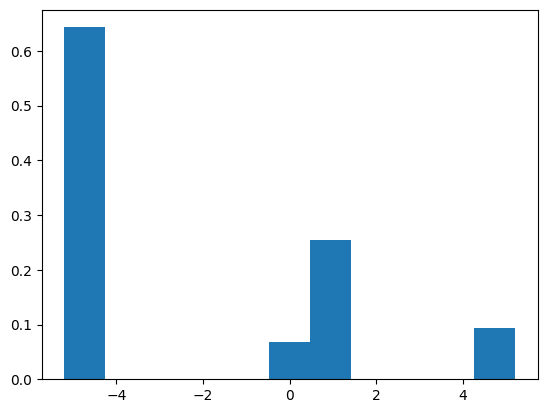

In [54]:
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

# Assuming df_processed is your DataFrame and 'attendance_rate' is your column
data = df_processed[['current_grade']]

# Create a QuantileTransformer object
qt = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')

# Transform the attendance_rate data
data_trans = qt.fit_transform(data)

# Plot the transformed data
plt.hist(data_trans, bins='auto', density=True)
plt.show()

In [55]:
df_processed['current_grade'].describe()

count    1000.000000
mean        1.080500
std         1.495997
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         4.000000
Name: current_grade, dtype: float64

In [56]:
df_processed['current_grade'].describe()

count    1000.000000
mean        1.080500
std         1.495997
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         4.000000
Name: current_grade, dtype: float64

In [57]:
# Calculate Q1, Q3 and IQR
Q1 = df_processed['current_grade'].quantile(0.25)
Q3 = df_processed['current_grade'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)


# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
print(lower_bound)
outliers_lower = df_processed[df_processed['current_grade'] < lower_bound]
print(outliers_lower)

0.0 2.0 2.0
-3.0
Empty DataFrame
Columns: [student_id, current_grade, attendance_rate, socio_emotional_score, average_grade_previous]
Index: []


In [60]:
df = pd.DataFrame(df_processed)

# Defining features and target variable
X = df[['attendance_rate', 'average_grade_previous', 'socio_emotional_score']]

y = df['current_grade']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.595865308406252


In [76]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape your data since sklearn requires you to
# X = df_processed[df_processed['attendance_rate'] > 90]['average_grade_previous'].values.reshape(-1,1)
# y = df_processed[df_processed['attendance_rate'] > 90]['current_grade'].values

X = df_processed['attendance_rate'].values.reshape(-1,1)
y = df_processed['current_grade'].values


# Create a LinearRegression object
reg = LinearRegression()

# Fit the model
reg.fit(X, y)

# Get the coefficient of determination (R^2)
r_sq = reg.score(X, y)

# Print the coefficient of determination
print('coefficient of determination:', r_sq)

# Print the intercept and slope
print('intercept:', reg.intercept_)
print('slope:', reg.coef_)

coefficient of determination: 0.7495966251138937
intercept: 0.006450048176583456
slope: [0.02758643]


Coefficient - 0.87 (for all is 0.75) is higher for when the attendance is higher than 90%. If you want to check the cofficient for the other cases, you can check the code below.

In [75]:
correlation = df_processed['attendance_rate'].corr(df_processed['current_grade'])
correlation

0.8657924838631327

*Conclusion:* The attendance is the most important feature for the prediction of the result. If the attendance is higher than 90%, the student will pass the course with a high probability. That is the reason everyone should focus on the attendance without any doubt.

Explanation:

A linear regression model is chosen for its simplicity and interpretability, suitable for a baseline model.

Please note that this is a simplified example. In a real-world application, you'd need a more comprehensive dataset, thorough data cleaning, feature engineering, and possibly more complex models depending on the problem's complexity and data characteristics. Remember, the goal of predictive modelling, especially in sensitive areas like education, is not just to achieve low error metrics but also to ensure that the model's predictions are interpretable, actionable, and lead to positive interventions.

* We define our features (X) and the target variable (y) we aim to predict.

* The data is split into training and testing sets to evaluate the model's performance on unseen data.

* The model is trained on the training set and then used to make predictions on the test set.
We use Root Mean Squared Error (RMSE) to evaluate the model, providing an idea of how off the predictions are from the actual values on average.

